<a href="https://colab.research.google.com/github/Angelpperez/Taca_2/blob/main/bibl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis Bibliométrico, Estado del Arte
##Autor: Angel Pérez

- Ecución de Búsqueda WoS(Web of Science):


In [1]:
!pip install wos

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 5.4 MB/s eta 0:00:00
  Created wheel for wos: filename=wos-0.2.7-py3-none-any.whl size=9902 sha256=629dbb64820fcab277f5fb0d9b9bd8aab75a5f9566c469f43190e17491c65fe3
  Stored in directory: /root/.cache/pip/wheels/fc/69/b7/fac562d3911d4578e6c72d8cf3384a66bb6917176276ebfc56
  Created wheel for limit: filename=limit-0.2.3-py3-none-any.whl size=2325 sha256=40e82c2cbe7c7bfcaa024bc254f46ae4520d14eb0a52fbbcff99c5200b5f417f
  Stored in directory: /root/.cache/pip/wheels/c1/7e/41/2060f75262656211fc713cded5d55ccb2a949e6fac70c6934d
Successfully built wos limit


In [5]:
%cd /content/

/content


In [10]:
!git clone https://github.com/Angelpperez/Taca_2.git
%cd /content/Taca_2

fatal: destination path 'Taca_2' already exists and is not an empty directory.
/content/Taca_2


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('savedrecs.xls', engine='xlrd')

In [12]:
# Guarda el archivo en formato .csv
df.to_csv('data.csv', index=False)
data = pd.read_csv('data.csv')
#print(data.head())

In [13]:
# Limpieza de datos
data.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Frecuencia de Publicaciones por Año')

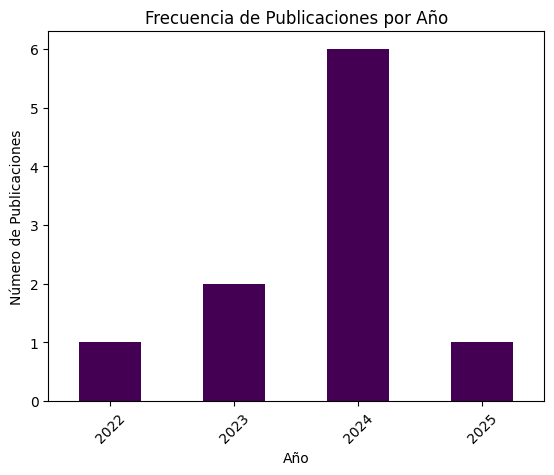

In [14]:
# Análisis de frecuencia de publicaciones por año
publicaciones_por_anio = data.groupby('Publication Year').size()

publicaciones_por_anio.plot(kind='bar', colormap='viridis')
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de Publicaciones')
plt.title('Frecuencia de Publicaciones por Año')

/tmp/ipython-input-1249186718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=autores_mas_citados.values, y=autores_mas_citados.index, palette='viridis')


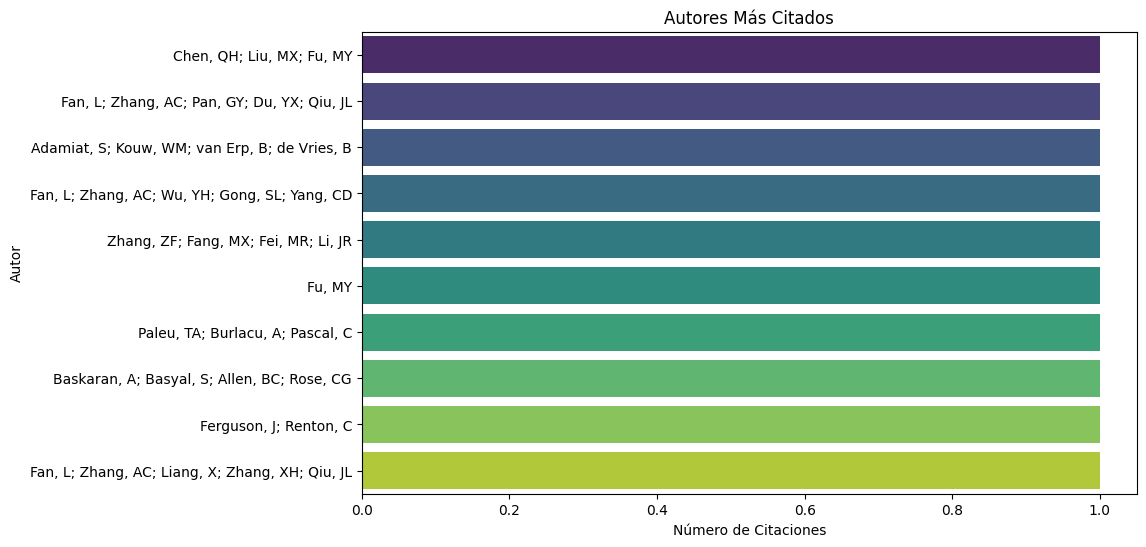

In [15]:
# Análisis de los autores más citados
autores_mas_citados = df['Authors'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=autores_mas_citados.values, y=autores_mas_citados.index, palette='viridis')
plt.title('Autores Más Citados')
plt.xlabel('Número de Citaciones')
plt.ylabel('Autor')
plt.show()

Author
Zhang, AC      3
Fan, L         3
Fu, MY         2
Qiu, JL        2
Liu, MX        1
Chen, QH       1
Pan, GY        1
Du, YX         1
Adamiat, S     1
Kouw, WM       1
van Erp, B     1
de Vries, B    1
Wu, YH         1
Gong, SL       1
Yang, CD       1
Zhang, ZF      1
Fang, MX       1
Fei, MR        1
Li, JR         1
Paleu, TA      1
Name: count, dtype: int64


/tmp/ipython-input-3670812711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=authors_counts.values, y=authors_counts.index, palette='viridis')


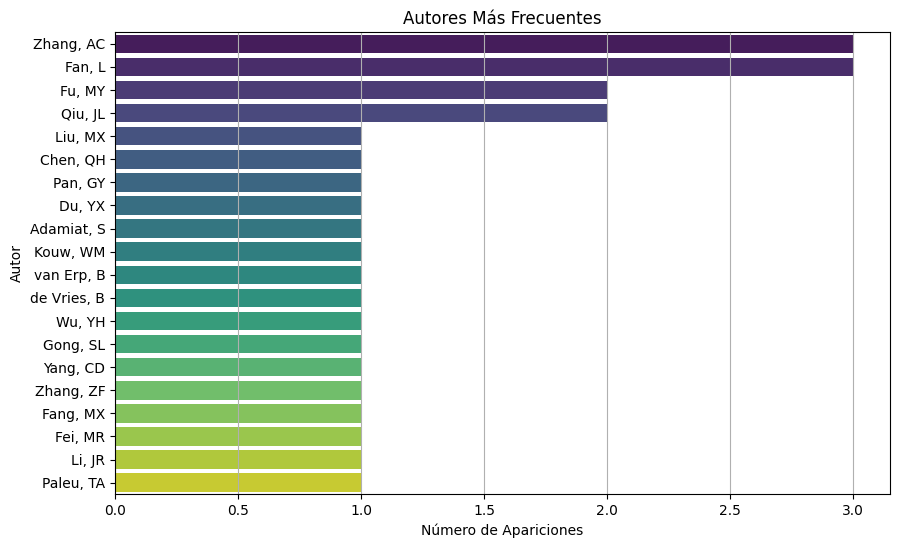

In [16]:
# Separar los nombres de autores en una lista si están en un solo campo
df['Authors'] = df['Authors'].str.split('; ')

# Crear un DataFrame a partir de la lista de autores
authors_df = pd.DataFrame(df['Authors'].tolist()).stack().reset_index(level=1, drop=True).to_frame('Author')

# Calcular los autores más frecuentes
authors_counts = authors_df['Author'].value_counts().head(20)

# Mostrar los autores más frecuentes
print(authors_counts)

# Visualización de los autores más citados
plt.figure(figsize=(10, 6))
sns.barplot(x=authors_counts.values, y=authors_counts.index, palette='viridis')
plt.title('Autores Más Frecuentes')
plt.xlabel('Número de Apariciones')
plt.ylabel('Autor')
plt.grid(axis='x')
plt.show()

                                       Article Title  Cited Reference Count
1  Swing-up and fixed-time stabilization control ...                     36
7  Neuromechanical Model-free Epistemic Risk Guid...                     27
6  Policy Transfer with Maximum Entropy Deep Rein...                     24
2  Message Passing-Based Bayesian Control of a Ca...                     23
4  Robust and Exponential Stabilization of a Cart...                     22
9  Study on Motion Control Problems for 3-DOF Und...                     20
3  Dynamics analysis and motion control for under...                     19
8  Port-Hamiltonian Representation of Mechanical ...                     16
5  Control of the Cart-Pole System: Model-based v...                      9
0  System Identification Based Control Design for...                      8


/tmp/ipython-input-2569378012.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publicaciones_mas_citadas['Cited Reference Count'], y=publicaciones_mas_citadas['Article Title'], palette='viridis')


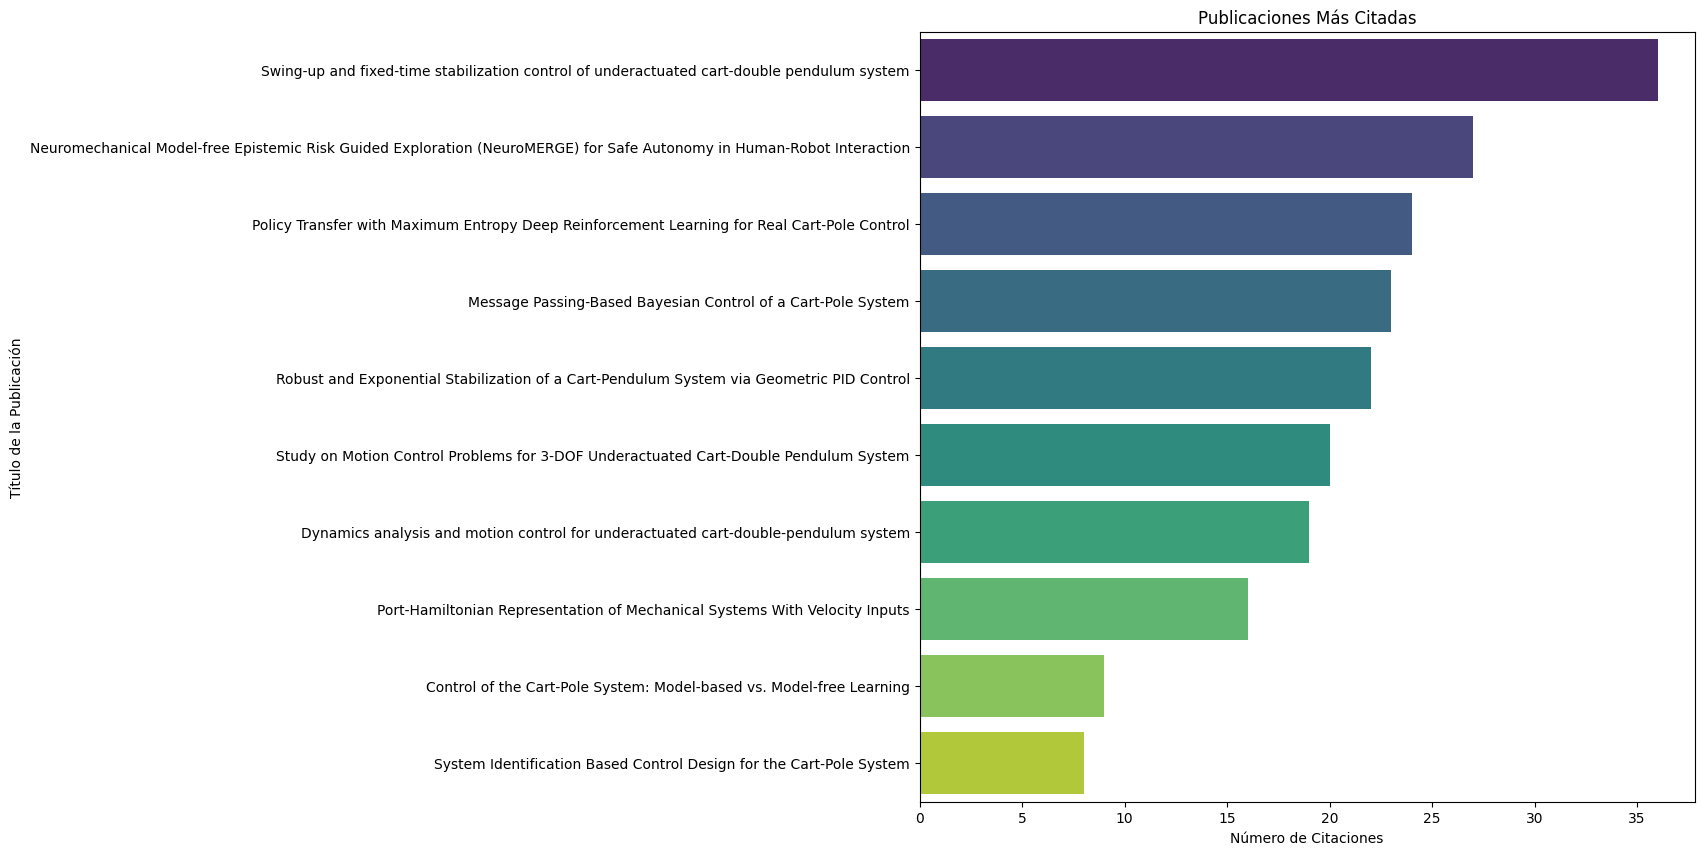

In [17]:
#Obtener publicaciones más citadas de los últimos 5 años
from datetime import datetime
# citas sea de tipo numérico
df['Cited Reference Count'] = pd.to_numeric(df['Cited Reference Count'], errors='coerce')

publicaciones_recientes = df[df['Publication Year'] >= datetime.now().year - 5]

# Obtener las publicaciones más citadas
publicaciones_mas_citadas = publicaciones_recientes.sort_values(by='Cited Reference Count', ascending=False).head(30)

# Mostrar las publicaciones más citadas
print(publicaciones_mas_citadas[['Article Title', 'Cited Reference Count']])

# Visualización de las publicaciones más citadas
plt.figure(figsize=(10, 10))
sns.barplot(x=publicaciones_mas_citadas['Cited Reference Count'], y=publicaciones_mas_citadas['Article Title'], palette='viridis')
plt.title('Publicaciones Más Citadas')
plt.xlabel('Número de Citaciones')
plt.ylabel('Título de la Publicación')
plt.show()

In [18]:
!pip install wordcloud networkx matplotlib

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

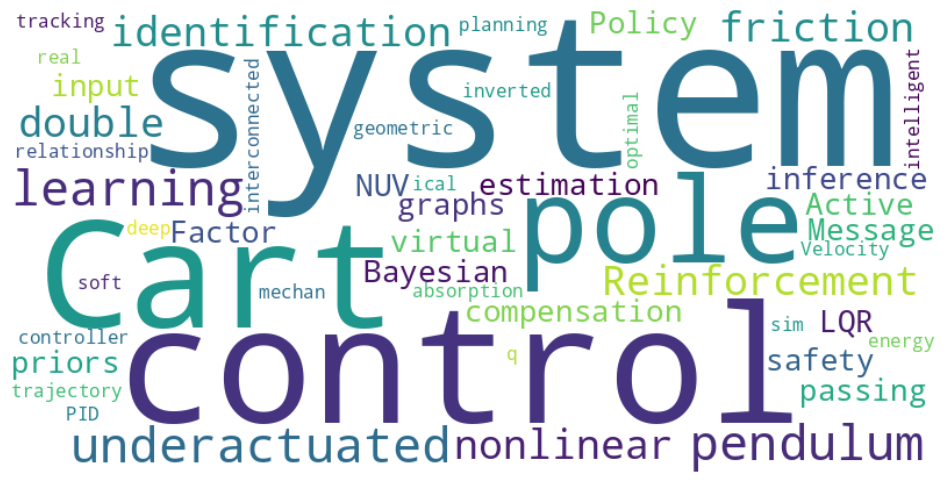

In [19]:
from wordcloud import WordCloud

# Unir todas las palabras clave en un solo string
text = ' '.join(df['Author Keywords'].dropna())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

Text(0.5, 1.0, 'Relaciones entre Palabras Clave')

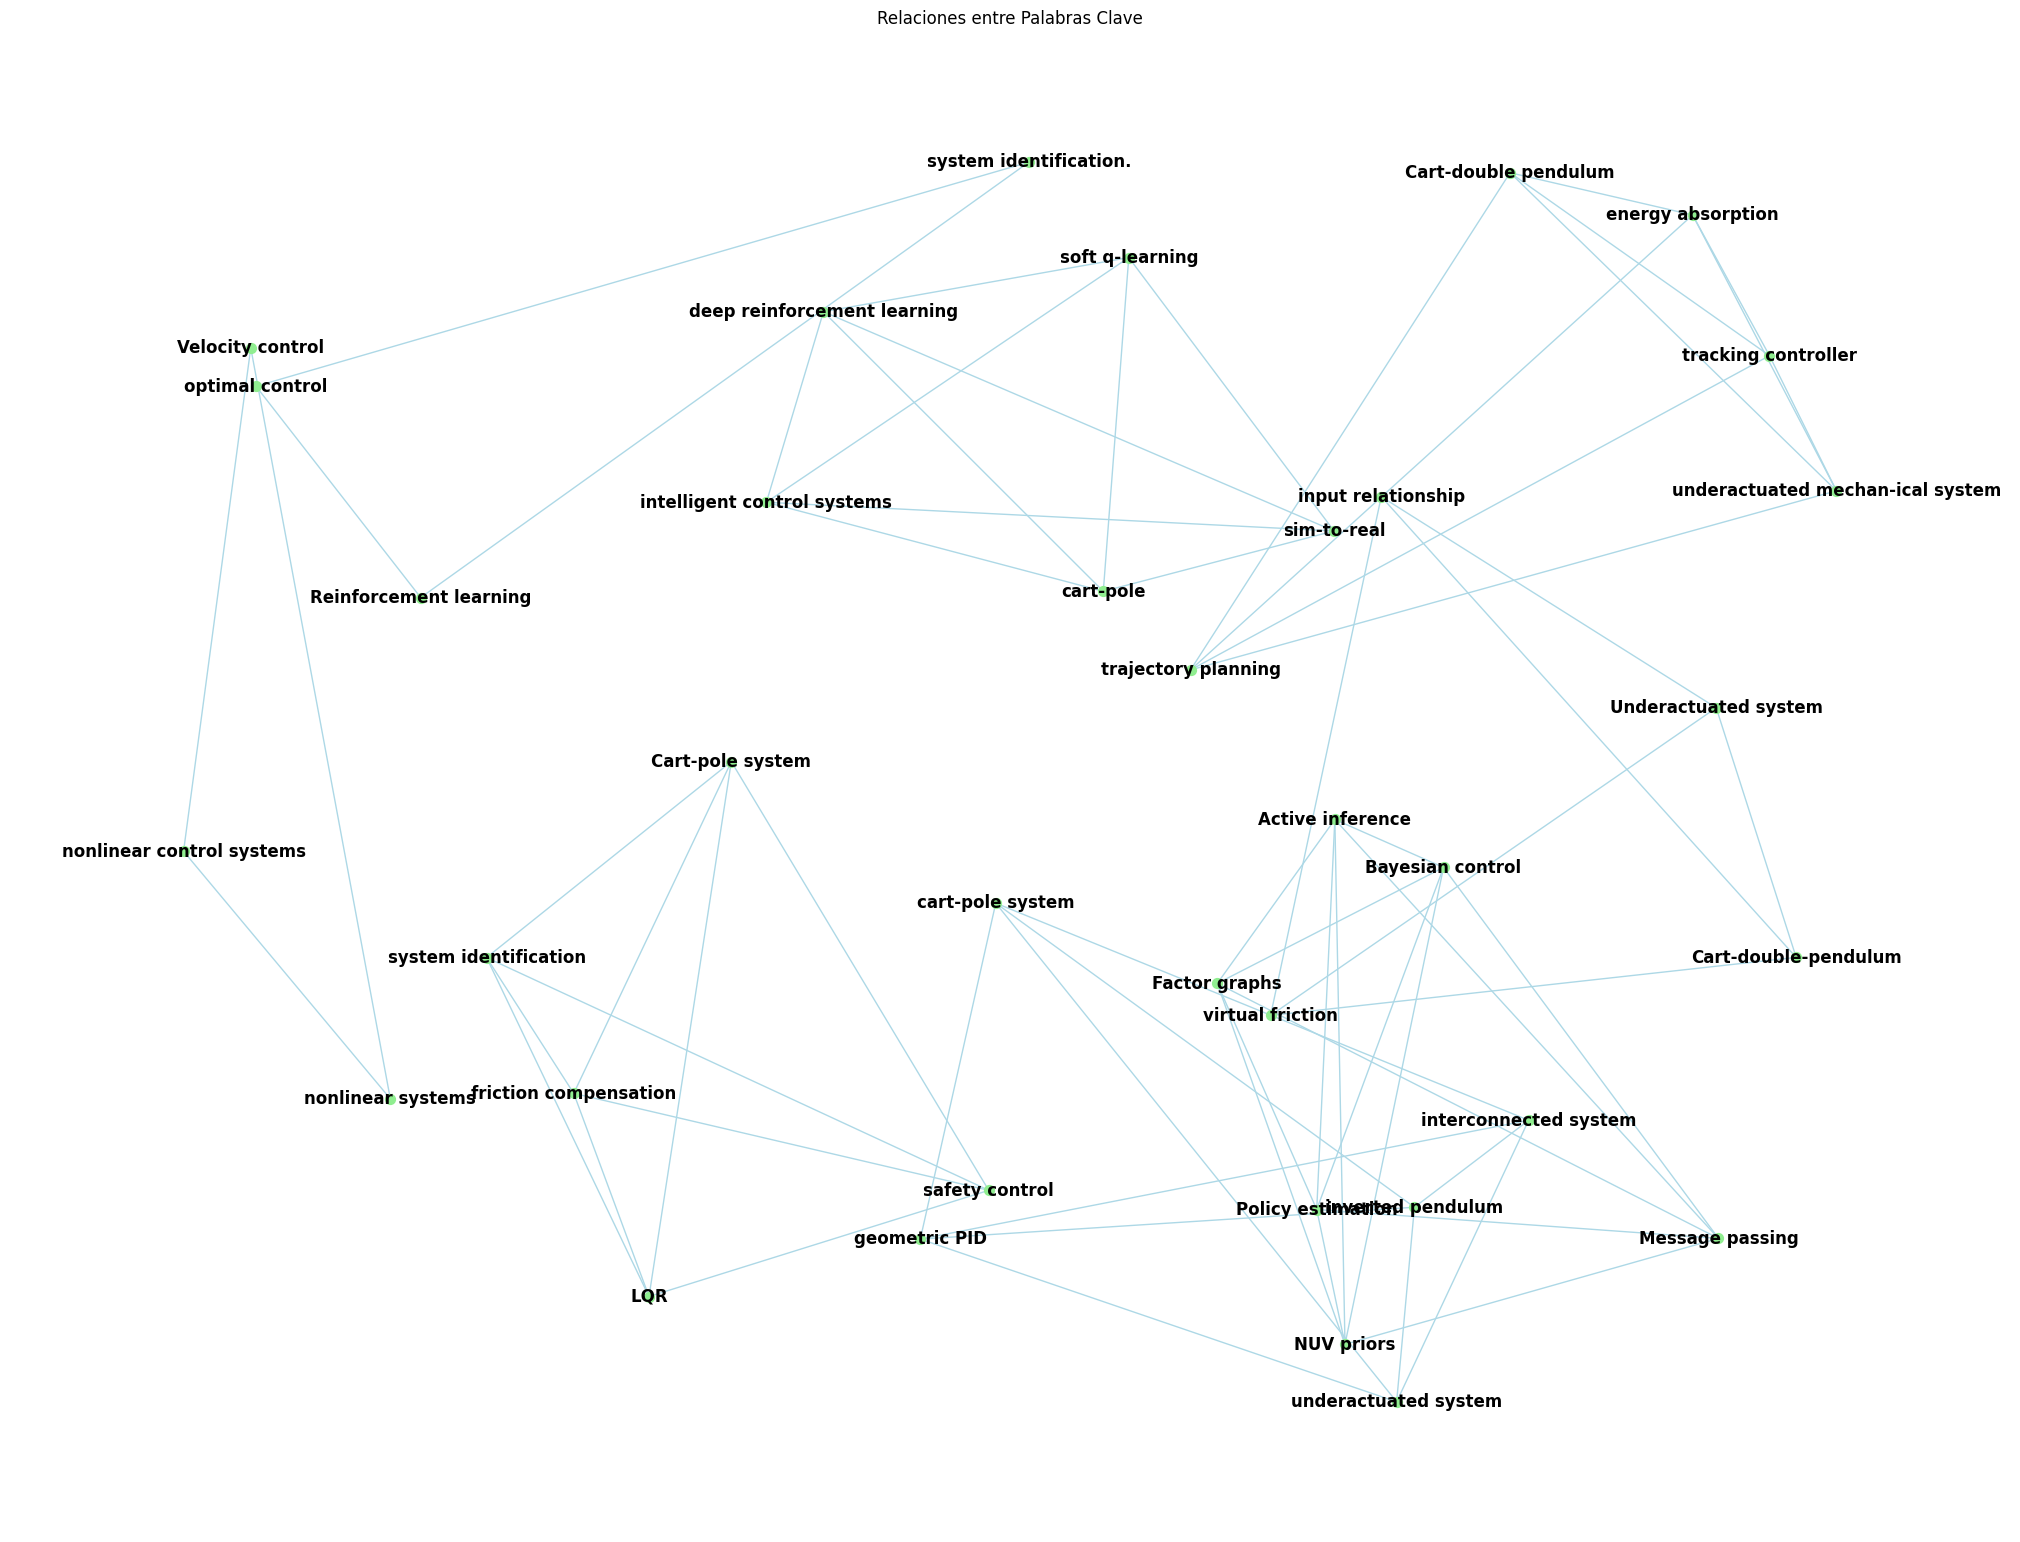

In [20]:
import networkx as nx

G = nx.Graph()

# Añadir nodos y aristas al grafo basados en las relaciones entre palabras clave
for index, row in publicaciones_mas_citadas.iterrows():
    keywords = row['Author Keywords']
    if pd.notna(keywords):
        keywords_list = keywords.split('; ')
        for i, word in enumerate(keywords_list):
            for j in range(i+1, len(keywords_list)):
                G.add_edge(keywords_list[i], keywords_list[j])

# Dibujar el grafo
plt.figure(figsize=(20,15))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=12, node_color="lightgreen", font_color="black", font_weight='bold', edge_color="lightblue")
plt.title('Relaciones entre Palabras Clave')